# Jay Kumar Pal 
# Task 2 :- Titanic Classification
# Making a system which tells whether the person will be save from sinking.
# Bharat Intern 

# Libraries required 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# importing files

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [3]:
titanic_train.head() #will give the first values of the data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [4]:
titanic_train.shape # will give the counts of rows and columns 

(891, 12)

In [5]:
titanic_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

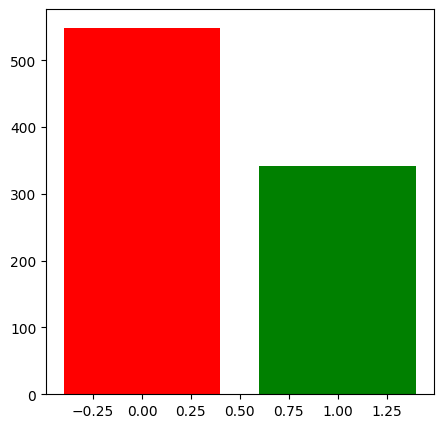

In [10]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=["r","g"])
plt.show

# red indicates the lives lost and green indicates the lives survived 

In [11]:
titanic_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

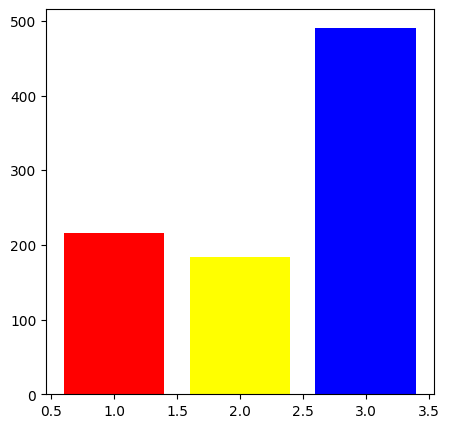

In [22]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=["Blue","Red","yellow"])
plt.show

# 1 bar indicates 1st Class Passenger 
# 2 bar indicates 2nd Class Passenger 
# 3 bar indicates 3rd Class Passenger 

In [23]:
titanic_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

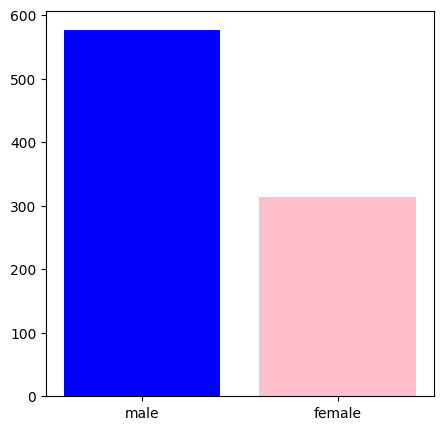

In [26]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color=["blue","pink"])
plt.show

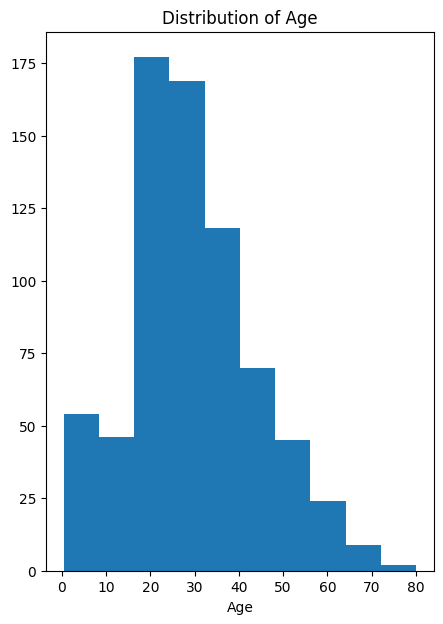

In [27]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

# Cleaning the Data

In [30]:
titanic_train['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [31]:
sum(titanic_train['Survived'].isnull())

0

In [41]:
sum(titanic_train['Age'].isnull())

177

In [49]:
titanic_train=titanic_train.dropna()

# building model

In [50]:
titanic_train['Age'].isnull()

1      False
3      False
6      False
10     False
11     False
       ...  
871    False
872    False
879    False
887    False
889    False
Name: Age, Length: 183, dtype: bool

In [51]:
sum(titanic_train['Age'].isnull())

0

In [52]:
x_train=titanic_train[['Age']]
y_train=titanic_train[['Survived']]

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtc = DecisionTreeClassifier()

In [58]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

# Predicting Value`

In [69]:
titanic_test = pd.read_csv('test.csv')

In [59]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
titanic_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [61]:
titanic_test.shape

(418, 11)

In [62]:
sum(titanic_test['Age'].isnull())

86

In [63]:
titanic_test=titanic_test.dropna()

In [64]:
sum(titanic_test['Age'].isnull())

0

In [65]:
x_test = titanic_test[['Age']]

In [67]:
y_pred = dtc.predict(x_test)

In [68]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)